# Fraud Detection using Python and sklearn

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib import pyplot as plt

In [17]:
import os
os.chdir('C:/Users/Boom/Documents/Data projects')

In [18]:
df = pd.read_csv('creditcard.csv')

In [19]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


-Dataset contains no categorical data, other than class variable  
-Class variable is a binary variable, with 0 = not fraud, 1 = fraud  
-only .1727% of data is fraud

In [20]:
df.columns.get_loc("Class")

30

## Logistic Regression

In [21]:
Y= df["Class"]
X=df.drop("Class",axis =1)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [57]:
model = LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\Boom\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
yhat= model.predict(X_test)

In [25]:
print("Model Accuracy:",model.score(X_test,Y_test))

Model Accuracy: 0.9988237772550121


In [26]:
f1 = f1_score(Y_test, yhat)

In [27]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [28]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(Y_test, probs)

In [53]:
# calculate precision-recall AUC
auc = auc(recall, precision)

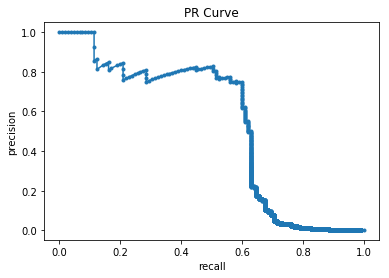

In [31]:
# plot for precision-recall curve for the model
plt.plot(recall, precision, marker='.')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PR Curve')
plt.show()

In [32]:
ap = average_precision_score(Y_test, probs)

In [33]:
print('Model Accuracy:',model.score(X_test,Y_test))
print("f1:", f1)
print("auc:", auc)
print("ap:",ap)

Model Accuracy: 0.9988237772550121
f1: 0.6528497409326425
auc: 0.5324327666996197
ap: 0.5339826552831959


At a first glance the Logistic Regression may seem like a good model in this case because it had an accuracy score of 0.9988. However, this dataset was highly imbalanced, with only .17% of data being fraud, so accuracy score is not such a good metric of success. f1, auc, and ap are better metrics of success in this case and the logistic regression did not have satisfactory scores in these metrics.

## Random Forest

In [34]:
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [35]:
model_rf = RandomForestClassifier(n_estimators=20, random_state=0)  
model_rf.fit(X_train, Y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [36]:
yhat= model_rf.predict(X_test)

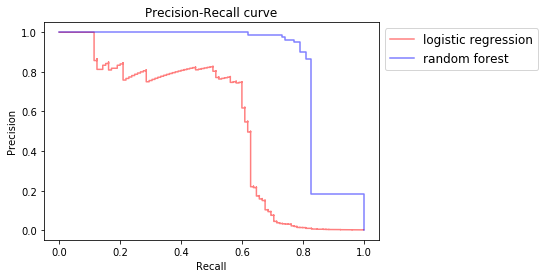

In [38]:
pred_prob = model_rf.predict_proba(X_test)
rf_score = pred_prob[:,1]
average_precision = average_precision_score(Y_test, rf_score)
rf_precision, rf_recall, rf_thresholds = precision_recall_curve(Y_test, rf_score)
plt.step(recall, precision, color='red', alpha=0.5,linewidth=1.5,label='logistic regression')
plt.step(rf_recall, rf_precision, color='blue', alpha=0.5,linewidth=1.5,label='random forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')

In [41]:
rf_f1 = f1_score(Y_test, yhat)
rf_auc = auc(rf_recall, rf_precision)
rf_ap = average_precision_score(Y_test, rf_score)

In [42]:
print('rf_Model Accuracy:',model_rf.score(X_test,Y_test))
print("rf_f1:", rf_f1)
print("rf_auc:", rf_auc)
print("rf_ap:",rf_ap)

rf_Model Accuracy: 0.9994908886626171
rf_f1: 0.8432432432432432
rf_auc: 0.834168701103226
rf_ap: 0.8162633522293585


now set n_estimators = 100 to see if we get better results than n_estimators=20

In [44]:
model_rf100 = RandomForestClassifier(n_estimators=100, random_state=0)  
model_rf100.fit(X_train, Y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

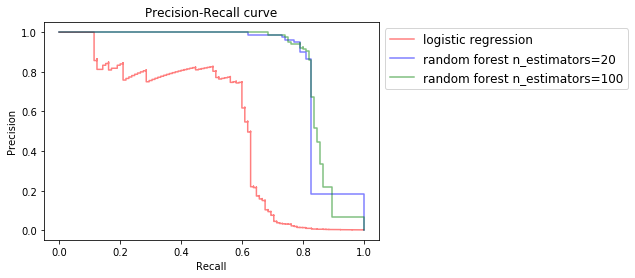

In [45]:
pred_prob100 = model_rf100.predict_proba(X_test)
rf_score100 = pred_prob100[:,1]
average_precision100 = average_precision_score(Y_test, rf_score100)
rf_precision100, rf_recall100, rf_thresholds100 = precision_recall_curve(Y_test, rf_score100)
plt.step(recall, precision, color='red', alpha=0.5,linewidth=1.5,label='logistic regression')
plt.step(rf_recall, rf_precision, color='blue', alpha=0.5,linewidth=1.5,label='random forest n_estimators=20')
plt.step(rf_recall100, rf_precision100, color='green', alpha=0.5,linewidth=1.5,label='random forest n_estimators=100')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')

In [49]:
yhat100= model_rf100.predict(X_test)
rf100_f1 = f1_score(Y_test, yhat100)
rf100_auc = auc(rf_recall100, rf_precision100)
rf100_ap = average_precision_score(Y_test, rf_score100)

Final Results

In [50]:
print('rf100_Model Accuracy:',model_rf100.score(X_test,Y_test))
print("rf100_f1:", rf100_f1)
print("rf100_auc:", rf100_auc)
print("rf100_ap:",rf100_ap)

rf100_Model Accuracy: 0.9995084442259752
rf100_f1: 0.8478260869565218
rf100_auc: 0.8461277332187708
rf100_ap: 0.8385135967113588


In [51]:
print('rf_Model Accuracy:',model_rf.score(X_test,Y_test))
print("rf_f1:", rf_f1)
print("rf_auc:", rf_auc)
print("rf_ap:",rf_ap)

rf_Model Accuracy: 0.9995084442259752
rf_f1: 0.8432432432432432
rf_auc: 0.834168701103226
rf_ap: 0.8162633522293585


In [58]:
print('Model Accuracy:',model.score(X_test,Y_test))
print("f1:", f1)
print("auc:", auc)
print("ap:",ap)

Model Accuracy: 0.9991397773954567
f1: 0.6528497409326425
auc: 0.5324327666996197
ap: 0.5339826552831959


In conclusion, the random forest model with n_estimators=100 had the est results as it had the highest accuracy, f1, auc, and ap scores. Thus this random forest model should be chosen over the Random forest Model with less n_estimators and also over the Logistic Regression model.